# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
url =  'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid='+ weather_api_key

city_record=[]
city_cloud=[]
city_country=[]
city_date=[]
city_humidity=[]
city_lat=[]
city_lng=[]
city_maxtemp=[]
city_wind=[]

print("Beginning Data Retrieval")
print("-----------------------------")


record_counter=1
set_counter=1

for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i>=50):
        set_counter+=1
        record_counter=1
        
        
    query_url = url + "&q=" + city
    
    print(f'Processing Record '+ str(record_counter) +' of Set '+ str(set_counter) +' | ' +str(city))
    
    record_counter += 1
    
    try:
        city_weather= requests.get(query_url).json()
        
        city_record.append(city_weather['name'])
        city_cloud.append(city_weather['clouds']['all'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])
        city_humidity.append(city_weather['main']['humidity'])
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_maxtemp.append(city_weather['main']['temp_max'])
        city_wind.append(city_weather['wind']['speed'])
    
    except:
        print(f''+city + ' was not found in openweathermap API')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | aflu
aflu was not found in openweathermap API
Processing Record 2 of Set 1 | vila
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | kieta
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | huilong
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | paracatu
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | vanimo
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | lavumisa
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hermanus
Processing Record 23

Processing Record 31 of Set 4 | boyolangu
Processing Record 32 of Set 4 | sechura
Processing Record 33 of Set 4 | cooma
Processing Record 34 of Set 4 | itoman
Processing Record 35 of Set 4 | airai
Processing Record 36 of Set 4 | viedma
Processing Record 37 of Set 4 | comodoro rivadavia
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | buraydah
Processing Record 40 of Set 4 | livingstonia
Processing Record 41 of Set 4 | horka nad moravou
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | leh
Processing Record 44 of Set 4 | teya
Processing Record 45 of Set 4 | dolbeau
dolbeau was not found in openweathermap API
Processing Record 46 of Set 4 | dukat
Processing Record 47 of Set 4 | alihe
Processing Record 48 of Set 4 | north ogden
Processing Record 49 of Set 4 | port-cartier
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | rock sound
Processing Record 3 of Set 5 | kabarnet
Proce

Processing Record 12 of Set 8 | liverpool
Processing Record 13 of Set 8 | balkanabat
Processing Record 14 of Set 8 | beringovskiy
Processing Record 15 of Set 8 | yerbogachen
Processing Record 16 of Set 8 | sao filipe
Processing Record 17 of Set 8 | hohhot
Processing Record 18 of Set 8 | hervey bay
Processing Record 19 of Set 8 | port hardy
Processing Record 20 of Set 8 | cabo san lucas
Processing Record 21 of Set 8 | watsa
Processing Record 22 of Set 8 | vaitupu
vaitupu was not found in openweathermap API
Processing Record 23 of Set 8 | liniere
liniere was not found in openweathermap API
Processing Record 24 of Set 8 | timra
Processing Record 25 of Set 8 | yeletskiy
yeletskiy was not found in openweathermap API
Processing Record 26 of Set 8 | gandu
Processing Record 27 of Set 8 | yantarnyy
Processing Record 28 of Set 8 | olinda
Processing Record 29 of Set 8 | ahipara
Processing Record 30 of Set 8 | masjed-e soleyman
masjed-e soleyman was not found in openweathermap API
Processing Recor

Processing Record 38 of Set 11 | san lazaro
Processing Record 39 of Set 11 | aktau
Processing Record 40 of Set 11 | okha
Processing Record 41 of Set 11 | mitsamiouli
Processing Record 42 of Set 11 | alenquer
Processing Record 43 of Set 11 | alta floresta
Processing Record 44 of Set 11 | brunsbuttel
Processing Record 45 of Set 11 | karamay
karamay was not found in openweathermap API
Processing Record 46 of Set 11 | sur
Processing Record 47 of Set 11 | goure
Processing Record 48 of Set 11 | popondetta
Processing Record 49 of Set 11 | ussel
Processing Record 50 of Set 11 | coquimbo
Processing Record 1 of Set 12 | negara
Processing Record 2 of Set 12 | azimur
azimur was not found in openweathermap API
Processing Record 3 of Set 12 | kano
Processing Record 4 of Set 12 | pasni
Processing Record 5 of Set 12 | yirol
yirol was not found in openweathermap API
Processing Record 6 of Set 12 | bathsheba
Processing Record 7 of Set 12 | lagoa
Processing Record 8 of Set 12 | constitucion
Processing Re

In [57]:
url =  'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid='+ weather_api_key
query_url = url + "&q=" + 'Bredasdorp'
city_weather = requests.get(query_url).json()
print(city_weather)

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61.43, 'pressure': 1015, 'humidity': 77, 'temp_min': 60.8, 'temp_max': 62.01}, 'wind': {'speed': 11.41, 'deg': 120}, 'clouds': {'all': 26}, 'dt': 1571004443, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1571025567, 'sunset': 1571071927}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
# cities_df.to_csv('Homework\Python_API-s\Instructions\output_data​Instructions/output_data/cities.csv', index=False, header=True)
# cities_df.count()

In [59]:
cities_df=pd.DataFrame({"City":city_record,"Cloudiness":city_cloud,"Country":city_country,
                       "Date":city_date,"Humidity":city_humidity,"Lat":city_lat,
                       "Lng":city_lng,"Max Temp":city_maxtemp,"Wind Speed":city_wind})

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vila,75,IT,1571004429,87,45.18,8.40,63.00,4.70
1,Georgetown,90,GY,1571004429,100,6.80,-58.16,77.00,4.70
2,Kieta,77,PG,1571004429,75,-6.22,155.63,80.69,5.60
3,Rikitea,100,PF,1571004429,85,-23.12,-134.97,69.55,16.51
4,Yar-Sale,100,RU,1571004430,93,66.83,70.83,34.21,8.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

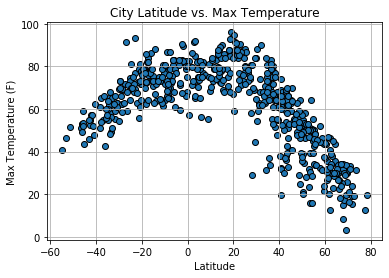

In [60]:
plt.grid('whitegrid')
plt.scatter(cities_df['Lat'],cities_df['Max Temp'],edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.show()

#### Latitude vs. Humidity Plot

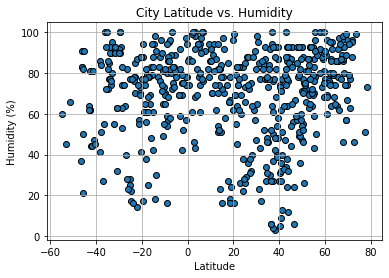

In [61]:
plt.grid('whitegrid')
plt.scatter(cities_df['Lat'],cities_df['Humidity'],edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

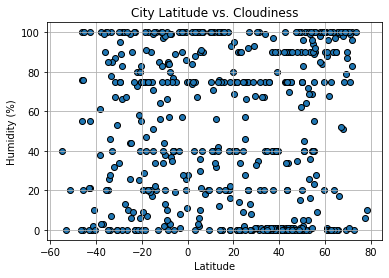

In [62]:

plt.grid('whitegrid')
plt.scatter(cities_df['Lat'],cities_df['Cloudiness'],edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

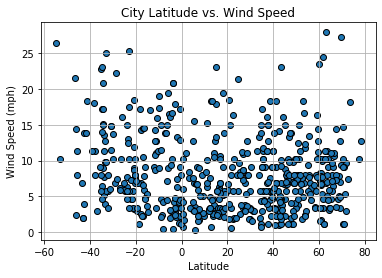

In [37]:
plt.grid('whitegrid')
plt.scatter(cities_df['Lat'],cities_df['Wind Speed'],edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [40]:
# Create a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[cities_df['Lat']>0,:]
north_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tezu,0,IN,1570990187,72,27.93,96.16,68.65,3.22
2,Cockburn Town,75,TC,1570990104,88,21.46,-71.14,78.80,3.36
6,Goure,0,NE,1570990600,19,13.98,10.27,93.99,11.01
7,Male,19,UA,1570990601,66,50.74,33.70,56.95,7.22
8,Naze,40,NG,1570990601,79,5.43,7.07,84.20,6.93


In [43]:
south_df = cities_df.loc[cities_df['Lat']<0,:]
south_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Mount Gambier,90,AU,1570990599,100,-37.83,140.78,55.40,8.05
3,Rikitea,100,PF,1570990082,83,-23.12,-134.97,69.01,17.55
4,Ushuaia,75,AR,1570990099,75,-54.81,-68.31,41.00,26.40
5,Punta Arenas,20,CL,1570990106,45,-53.16,-70.91,48.20,10.29
11,Carnarvon,0,ZA,1570990127,15,-30.97,22.13,65.95,14.79


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8491277895937607


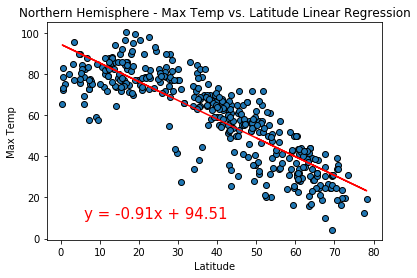

In [44]:

x_values=north_df['Lat']
y_values=north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7117745567072394


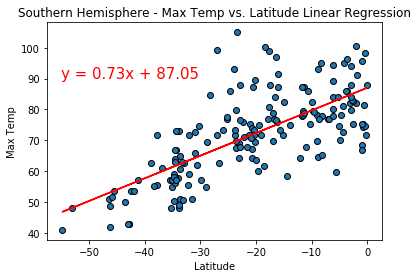

In [45]:
x_values=south_df['Lat']
y_values=south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq1= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq1,(-55,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15692576824809415


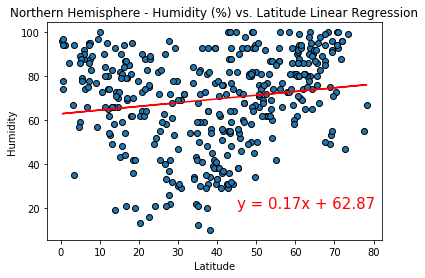

In [46]:
x_values=north_df['Lat']
y_values=north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0350923957577461


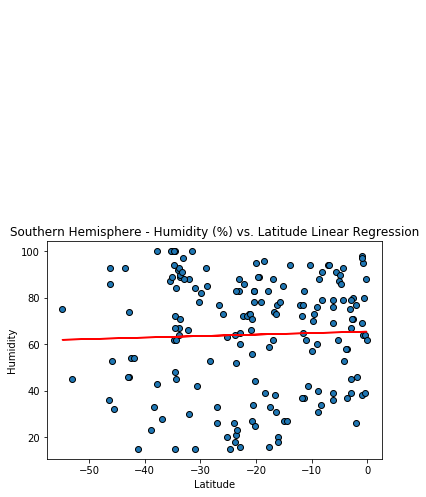

In [53]:
x_values=south_df['Lat']
y_values=south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq3= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq3,(-40,200),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06912242787916054


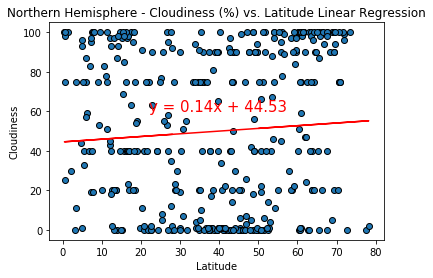

In [48]:
x_values=north_df['Lat']
y_values=north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq4= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq4,(22,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17204403893075595


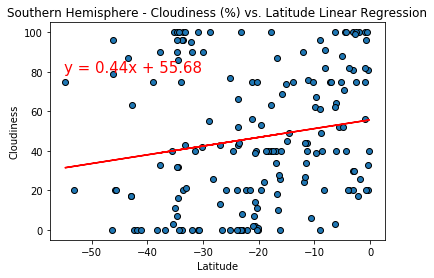

In [52]:
x_values=south_df['Lat']
y_values=south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq5= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq5,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1449520569810721


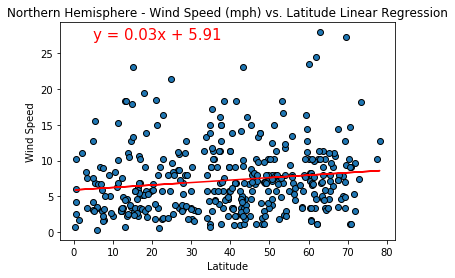

In [50]:
x_values=north_df['Lat']
y_values=north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq6= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq6,(5,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20547637133655808


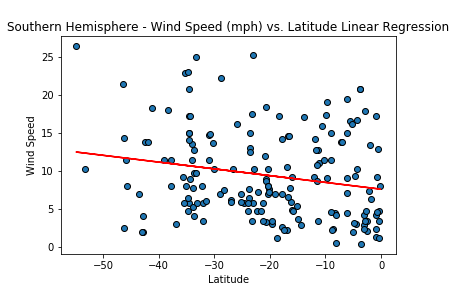

In [51]:
x_values=south_df['Lat']
y_values=south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq7= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq7,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()